In [1]:
from DS_detector import gen_pics_for_detection, detect_clusters
from DS_Planck_Unet import *
from DS_data_transformation import draw_df
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from tensorflow import convert_to_tensor
from DS_healpix_fragmentation import one_pixel_fragmentation, matr2dict, \
    draw_proper_circle, pix2radec

In [2]:
model = load_planck_model(
    '/home/rt2122/Models/planck_z/f8d2.ep0040.hdf5')

In [17]:
all_dict = gen_pics_for_detection(41, model, step=16)

In [8]:
thr_list = [0.1 * i for i in range(9, 0, -1)]

In [18]:
len(all_dict['true_clusters']['act'])

34

In [19]:
stat_p = []
stat_pnz = []
stat_m = []
stat_a = []
for thr in tqdm(thr_list):
    stat_p.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='planck_z', 
                                max_dist=5/60), index=[0]))
    stat_pnz.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='planck_no_z', 
                                max_dist=5/60), index=[0]))
    stat_m.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='mcxcwp', 
                                max_dist=5/60), index=[0]))
    stat_a.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='act', 
                                max_dist=5/60), index=[0]))
stat_p = pd.concat(stat_p)
stat_pnz = pd.concat(stat_pnz)
stat_m = pd.concat(stat_m)
stat_a = pd.concat(stat_a)

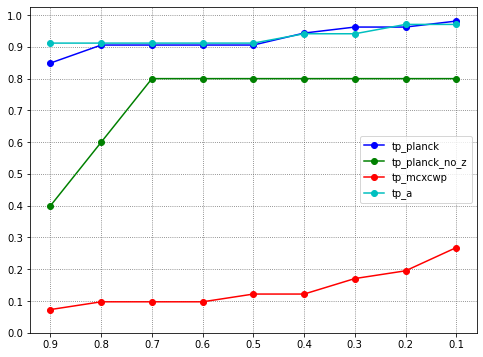

In [20]:
draw_df({'tp_planck' : stat_p['tp'] / (stat_p['tp'] + stat_p['fn']), 
               'tp_planck_no_z' : stat_pnz['tp'] / (stat_pnz['tp'] + stat_pnz['fn']),
               'tp_mcxcwp' : stat_m['tp'] / (stat_m['tp'] + stat_m['fn']),
               'tp_a' : stat_a['tp'] / (stat_a['tp'] + stat_a['fn']),
              },
        thr_list, ygrid=np.arange(0,1.1, 0.1))

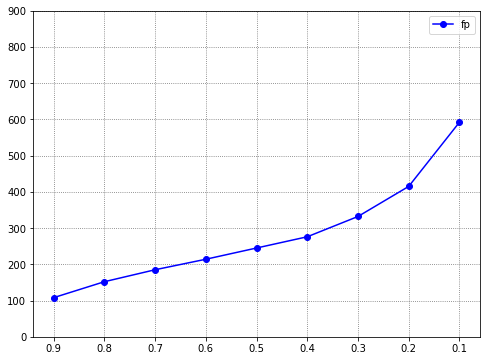

In [21]:
draw_df({'fp':stat_p['fp']},
        thr_list, ygrid=np.arange(0,1000,100))

In [22]:
stat_a

,tp,fp,tn,fn
0,31,108,968,3
0,31,152,812,3
0,31,185,736,3
0,31,214,663,3
0,31,245,608,3
0,32,276,546,2
0,32,332,462,2
0,33,415,378,1
0,33,592,259,1
